# Зачетное задание по курсу "Математическая статистика и анализ данных"
#### Выполнил студент 3-го курса Биологического факультета МГУ Красников Сергей.

# Импорт данных и удаление строк с пустыми значениями
В данном разделе производится подготовка исходных данных к анализу путем удаления всех строк, которые содержат хотя бы одно пропущенное значение. Также проводится сброс индексов для избежания возможных проблем с обращением к полученному DataFrame.

In [1]:
import pandas as pd # Импорт библиотеки

flights_not_cleaned = pd.read_csv("/home/kvasonaft/Documents/flights.csv") # Импорт набора данных в DataFrame
flights_cleaned = flights_not_cleaned.dropna() # Удаление строк с пустыми значениями
flights = flights_cleaned.reset_index(drop = True) # Сброс индексов

# Задание №1
### Формулировка задания
Выберите 10 аэропортов, в которые чаще всего летают из Нью-Йорка. Для каждого из них оцените вероятность, что рейс прилетит с положительной задержкой (arr_delay > 0) и постройте график (столбчатая диаграмма), на котором по оси х – название аэропорта, по оси y – вероятность задержки прилета. Названия аэропортов по оси х расположите слева направо по убыванию количества рейсов в этот аэропорт. Для какого аэропорта из этих 10 вероятность окажется наибольшей, и для какого – наименьшей?

### Описание действий
Сначала необходимо узнать 10 аэропортов, в которые чаще всего летают из Нью-Йорка. Для этого производится фильтрация исходной таблицы по соответствию значения переменной "origin" значению "JFK", так как это и есть аэропорт, расположенный в Нью-Йорке. Затем при помощи метода value_counts() создается Series, в котором показывается число перелетов в каждый аэропорт из Нью-Йорка. Далее при помощи цикла рассчитывается вероятность положительной задержки прилёта рейса путем деления числа рейсов с положительной задержкой на общее число рейсов для данного аэропорта прилёта. На основании полученных значений строится столбчатая диаграмма. Максимальная и минимальная вероятности оцениваются по этой диаграмме.

#### Десять необходимых аэропортов

In [2]:
from_JFK = flights[flights["origin"] == "JFK"] # Получение DataFrame, в котором все аэропорты отправления - это JFK
JFK_airports = flights[flights["origin"] == "JFK"]['dest'].value_counts() # Получение Series с числом перелетов в каждый аэропорт прилёта
print(f'Чаще всего из Нью-Йорка вылеты соверщались в следующие аэропорты: {', '.join(JFK_airports[0:10].index)}.') # Вывод списка первых 10 аэропортов

Чаще всего из Нью-Йорка вылеты соверщались в следующие аэропорты: LAX, SFO, BOS, MCO, SJU, FLL, LAS, BUF, MIA, DCA.


Выяснилось, что чаще всего из Нью-Йорка самолеты летают в следующие аэропорты (по убыванию числа рейсов): LAX, SFO, BOS, MCO, SJU, FLL, LAS, BUF, MIA, DCA.

#### Расчёт вероятности положительной задержки прилёта

In [3]:
import numpy as np # Импорт библиотеки

result = [] # Создание пустого списка для записи в него результатов вычислений в цикле

for value in list(JFK_airports[0:10].index): # Цикл для расчета вероятности положительной задержки
    all_arr_delay = from_JFK[from_JFK['dest'] == value]['arr_delay'] # Список, содержащий все значения задержек прилёта
    plus_arr_delay = all_arr_delay[all_arr_delay > 0] # Список, содержащий положительные значения задержек прилёта
    probability = (len(plus_arr_delay) / len(all_arr_delay)) # Расчёт вероятности положительной задержки прилёта
    result.append(probability) # Добавление вероятности вероятности положительной задержки прилёта для конкретного аэропорта

data_to_barplot_1 = pd.DataFrame({"Airport": list(JFK_airports[0:10].index), "Delay": result}) # Создание DataFrame для построения диаграммы

#### Построение гистограммы

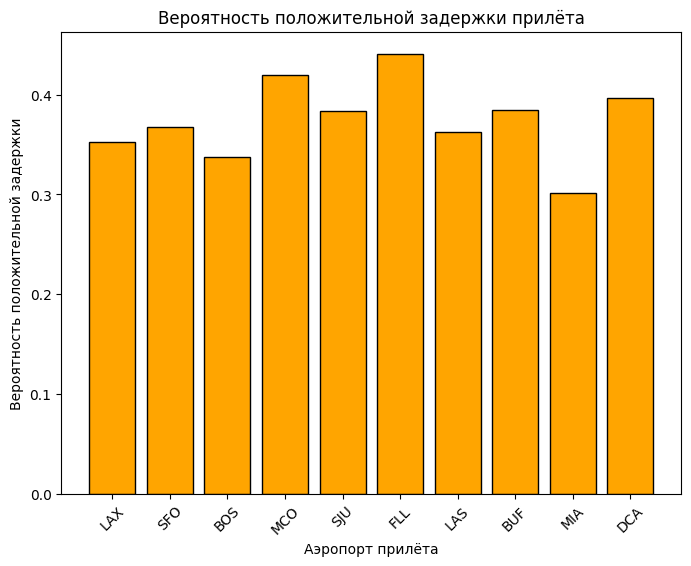

In [4]:
import matplotlib.pyplot as plt # Подключение библиотеки

plt.figure(figsize = (8, 6)) # Настройка размеров графика
plt.bar(data_to_barplot_1['Airport'], data_to_barplot_1['Delay'], color = 'orange', edgecolor = 'black') # Создание столбчатой диаграммы
plt.title("Вероятность положительной задержки прилёта") # Добавление названия диаграммы
plt.xlabel("Аэропорт прилёта") # Добавления названия оси абсцисс
plt.ylabel("Вероятность положительной задержки") # Добавление названия оси ординат
plt.xticks(rotation = 45) # Поворот названий аэропортов на 45 градусов для повышения читаемости
plt.show() # Вывод столбчатой диаграммы

#### Максимальная и минимальная вероятности

На полученной столбчатой диаграмме видно, что максимальная вероятность положительной задержки прилёта имеет место для аэропорта "FLL", минимальная - для "MIA".

# Задание №2
### Формулировка задания
Постройте нормированную гистограмму распределения времени перелета из Нью-Йорка в Сан-Франциско (SFO). Предполагая, что это распределение описывается нормальным законом, оцените параметры нормального закона и наложите график плотности полученного нормального закона на график с гистограммой. В каких пределах с вероятностью не менее 95% лежит время полета?

### Описание действий
Для выполнения данного задания сначала создается список, содержащий значения времени перелёта из аэропорта JFK в аэропорт SFO. После на основании этих данных создаётся нормированная гистограмма, то есть гистограмма, в которой площадь под всеми столбиками равняется единице. Нормирование производится с помошью аргумента density = True. Параметры нормального закона - $\mu$ и $\sigma$ оцениваются по принципу максимального правдоподобия (MLE):

$$ \hat\mu = \bar X = \frac{\sum_{i = 1}^n x_i}{n} $$
$$ \hat\sigma = \sqrt{\hat\sigma^2} = \sqrt{\frac{\sum_{i = 1}^n (x_i - \hat\mu)^2}{n}} $$

После получения значений параметров нормального распределения генерируется 1000 точек на оси абсцисс и соответствующие им точки плотности нормального распределения с заданными параметрами. По этим точкам строится график плотности полученного нормального закона.

Для рассчета пределов, в которых с вероятностью не менее 95% лежит значение времени полёта, используется правило двух $\sigma$, согласно которому 95,44% значений будут находиться в пределах двух $\sigma$. Время полёта с вероятностью менее 95% лежит в интервале от 314.0 до 381.0 (вывод автоматически выводится в конце данного блока).

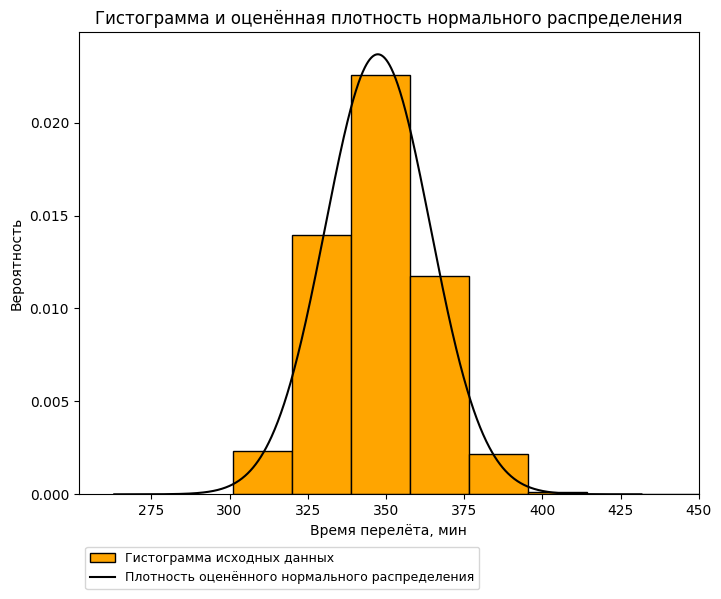

Время полёта с вероятностью менее 95% лежит в интервале от 314.0 до 381.0.


In [5]:
from scipy.stats import norm # Подключение функции из библиотеки

flight_time = from_JFK[from_JFK['dest'] == 'SFO']['air_time'] #  Получение списка времени перелёта из JFK в SFO

mu_mle = flight_time.mean() # Расчёт первого параметра нормального распределения
sigma_mle = flight_time.std(ddof = 0) # Расчёт второго параметра нормального распределения

x = np.linspace(mu_mle - 5*sigma_mle, mu_mle + 5*sigma_mle, 1000) # Создание 1000 точек на равном расстоянии друг от друга
pdf = norm.pdf(x, mu_mle, sigma_mle) # Расчёт плотности вероятности нормального распределения

plt.figure(figsize = (8, 6)) # Настройка размеров графика
plt.hist(flight_time, density = True, color = 'orange', edgecolor = 'black', # Построение гистограммы времени перелёта из JFK в SFO
         label = 'Гистограмма исходных данных') 
plt.plot(x, pdf, color = 'black',
         label = 'Плотность оценённого нормального распределения') # Построение графика плотности нормального распределения
plt.title('Гистограмма и оценённая плотность нормального распределения') # Добавление названия графика
plt.xlabel('Время перелёта, мин') # Добавление названия оси абсцисс
plt.ylabel('Вероятность') # Добавление названия оси ординат
plt.xlim(right = 450) # Ограничение значений оси абсцисс для удаления неинформативной пустой области
plt.legend(loc='upper left', bbox_to_anchor=(0, -0.1), fontsize=9) # Размещение легенды за пределами графика
plt.show() # Вывод полученных графиков

lower_bound = (mu_mle - 2*sigma_mle).round() # Вычисление нижней границы интервала
upper_bound = (mu_mle + 2*sigma_mle).round() # Вычисление верхней границы интервала

print(f"Время полёта с вероятностью менее 95% лежит в интервале от {lower_bound} до {upper_bound}.") # Вывод границ интервала

# Задание №3
### Формулировка задания
Нарисуйте распределение по часам (0-23) количества вылетов из аэропорта JFK и найдите два пиковых часа (один до полудня, другой – после полудня) по количеству вылетов (время вылета переводите в час вылета округлением вниз, например 7:20 -> 7, 16:45 -> 16). Для каждого из двух найденных пиковых часов найдите среднее время задержки вылетов в этот час. Когда средняя задержка больше? Будет ли это различие в средних значениях статистически значимо?

### Описание действий
Для выполнения данного задания сначала было произведено округление значений времени вылетов вниз, для чего исходное значение делилось на 100, а целый остаток от деления записывался в список. Далее был создан DataFrame, который соответствует DataFrame, где оставлено только одно значение аэропорта вылета - JFK, но с округленным временем. После при помощи цикла для каждого часа было найдено число вылетов и построена соответствующая столбчатая диаграмма. Пиковые часы (8 и 16 часов) оценивались визуально на основании диаграммы. Затем были рассчитаны средние значения времени задержки вылетов в данные часы и соответствующие им доверительные интервалы с уровнем доверия равным 95% распределения Стьюдента. Чтобы узнать, являются ли различия в средних значениях задержек вылета статистически значимыми, выборки были сначала проверены на нормальность при помощи критерия Колмогорова-Смирнова, который показал достоверное отклонение от нормальности (p-value < 0.05), визуальный анализ распределений значений в выборках это подтвердил. В связи с этим был применён непараметрический U-критерий Манна-Уитни (так как выборки независимы). Он показал достоверное различие средних по выборкам значений задержек вылета в 8 и 16 часов (p-value < 0.05).

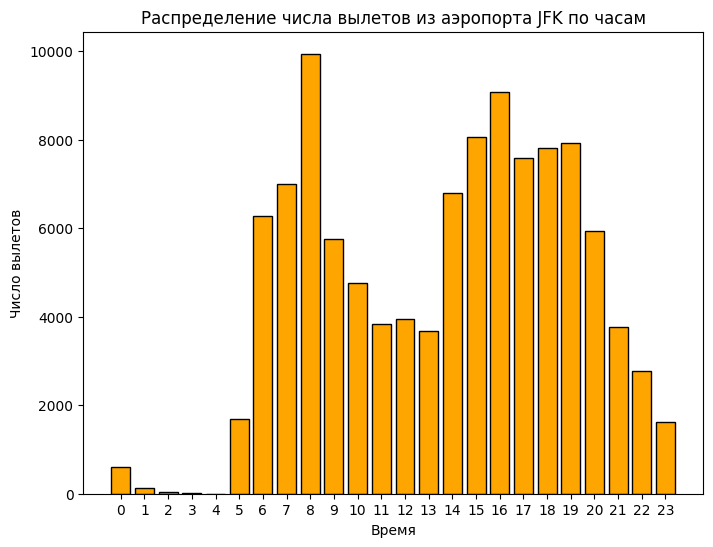

In [6]:
time_rounded = from_JFK['dep_time'] // 100 # Получение списка с округленными значениями времени вылетов
from_JFK_time_rounded = from_JFK.copy() # Копирование DataFrame
from_JFK_time_rounded['dep_time'] = time_rounded # Замена исходного столбца на столбец с округленными значениями

time = pd.Series(range(0, 24)) # Создание Series со значениями времени
number_of_flights = [] # Создание пустого списка для записи в него числа вылетов за конкретный час

for i in time: # Цикл для нахождения числа вылетов для каждого часа
    number = len(from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == i]['dep_time']) # Число вылетов за один час
    number_of_flights.append(number) # Добавление числа вылетов за один час в список

plt.figure(figsize = (8, 6)) # Настройка размеров графика
plt.bar(time, number_of_flights, color = 'orange', edgecolor = 'black') # Построение столбчатой диаграммы
plt.title('Распределение числа вылетов из аэропорта JFK по часам') # Добавление названия графика
plt.xlabel('Время') # Добавление названия оси абсцисс
plt.ylabel('Число вылетов') # Добавление названия оси ординат
plt.xticks(time) # Добавление меток всех значений на оси абсцисс
plt.show() # Вывод графика

На столбчатой диаграмме видно, что пиковые значения числа вылетов из аэропорта JFK имеют место в 8 и 16 часов.

#### Вычисление средних значений задержки вылета

In [7]:
import scipy.stats as stats

alpha = 0.05
means = []
error = []

for i in [8, 16]:
    mean_time = from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == i]['dep_delay'].mean().round(2) # Средняя задержка
    std_time = from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == i]['dep_delay'].std().round()
    len_time = len(from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == i]['dep_delay']) 
    t_critical = stats.t.ppf(1 - alpha / 2, df=len_time-1)
    margin_of_error = (t_critical * (std_time / np.sqrt(len_time))).round(2)
    means.append(mean_time)
    error.append(margin_of_error)

Таким образом, для вылетов, совершаемых в 8 часов среднее значение задержки вылета составляет $1.04 \pm 0.41$ минут, а для вылетов, совершаемых в 16 часов, - $10.87 \pm 0.56$ минут. Доли минут указаны не в секундах для удобства.

#### Расчёт статистической значимости различий в средних значениях задержки вылета

KS statistic: 0.2153, p-value: 0.0000


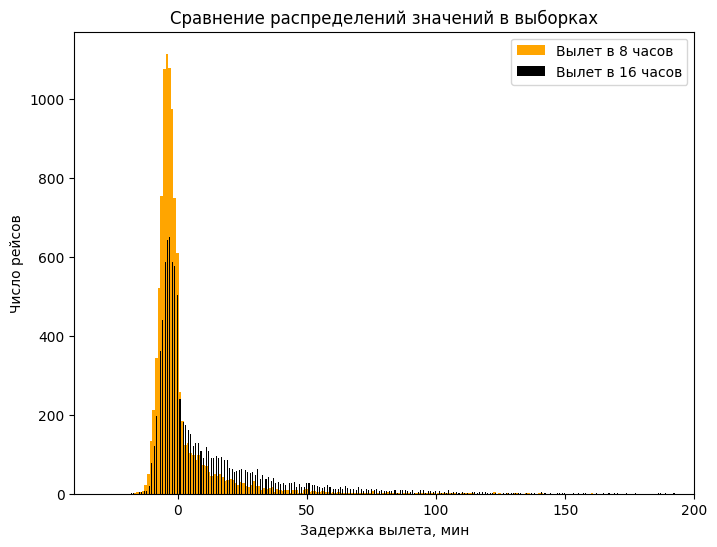

In [8]:
sample_8 = from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == 8]['dep_delay']
sample_16 = from_JFK_time_rounded[from_JFK_time_rounded['dep_time'] == 16]['dep_delay']

statistic, p_value = stats.kstest(sample_8, 'norm', args=(np.mean(sample_8), np.std(sample_8, ddof = 0)))
statistic, p_value = stats.kstest(sample_16, 'norm', args=(np.mean(sample_16), np.std(sample_16, ddof = 0)))

print(f"KS statistic: {statistic:.4f}, p-value: {p_value:.4f}")

plt.figure(figsize = (8, 6))
plt.hist(sample_8, bins = 1000, color = 'orange', label = 'Вылет в 8 часов')
plt.hist(sample_16, bins = 1000, color = 'black', label = 'Вылет в 16 часов')
plt.xlim(left = -40, right = 200)
plt.title('Сравнение распределений значений в выборках')
plt.xlabel('Задержка вылета, мин')
plt.ylabel('Число рейсов')
plt.legend()
plt.show

from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(sample_8, sample_16, alternative='two-sided')

Согласно результатам t-критерия Стьюдента, p-значение сильно меньше, чем 0.05, следовательно, различие между средними значениями задержек вылета из аэропорта JFK в 8 и 16 часов статистически значимо.

# Задание №4
### Формулировка задания
Для каждого аэропорта прилета найдите величину стандартного отклонения времени перелета. Постройте график (точечная диаграмма) зависимости стандартного отклонения от расстояния до аэропорта. Аппроксимируйте полученную зависимость моделью линейной регрессии на основе расстояния до аэропорта Добавьте к предыдущему графику график линейной регрессии. Уточните модель линейной регрессии, используя дополнительные входные признаки на основе расстояния до аэропорта. Добавьте график уточненной модели. Сравните точность моделей.

### Описание действий
Для выполнения данного задания был создан словарь, в котором содержатся средние значения расстояния до аэропорта прилёта (усреднение необходимо, так как одному аэропорту прилёта соответствует несколько аэропортов вылета) и стандартные отклонения времени полёта для данного аэропорта прилёта. На основании этого словаря была построена точечная диаграмма зависимости стандартного отклонения времени полёта от расстояния до аэропорта. После была построена соответствующая модель линейной регрессии с предварительным разделением выборки на обучающую и тестовую, её график добавлен на точечную диаграмму. В качестве метрик использовались средняя квадратичная ошибка (MSE) и коэффициент детерминации $R^2$.

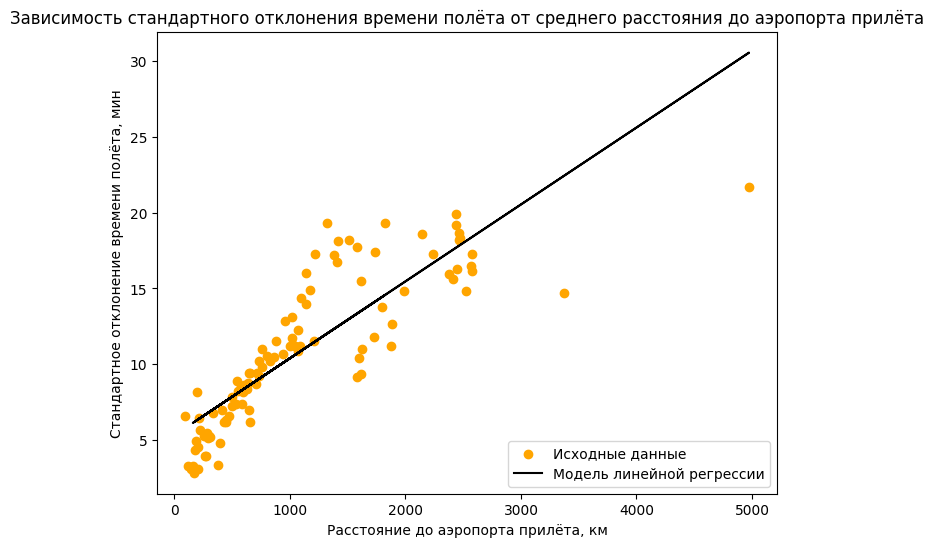

MSE: 9.953225144167211
R²: 0.6106326026758013


In [9]:
from sklearn.model_selection import train_test_split # Импорт модуля
from sklearn.metrics import mean_squared_error, r2_score # Импорт модулей

grouped = flights.groupby('dest').agg({ # Создание словаря
    'distance': 'mean', # Средние значения расстояния до аэропорта прилёта
    'air_time': 'std'}).dropna() # Значения стандартного отклонения времени полёта

from sklearn.linear_model import LinearRegression # Импорт модуля линейной регрессии

X = grouped['distance'].values.reshape(-1, 1) # Запись средних значений расстояния в array и изменение формы массива
y = grouped['air_time'].values # Запись значений стандартного отклонения времени полёта в array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # Разделение выборки на обучающую и тестовую

model = LinearRegression() # Создание модели линейной регрессии
model.fit(X_train, y_train) # Обучение модели линейной регрессии

y_pred = model.predict(X_test) # Создание предсказанных моделью значений

plt.figure(figsize = (8, 6)) # Выбор размера графика
plt.scatter(grouped['distance'], grouped['air_time'], color = 'orange', label = 'Исходные данные') # Создание точечной диаграммы
plt.plot(X_test, y_pred, color = 'black', label = 'Модель линейной регрессии') # Вывод графика модели линейной регрессии
plt.title('Зависимость стандартного отклонения времени полёта от среднего расстояния до аэропорта прилёта') # Добавление названия графика
plt.xlabel('Расстояние до аэропорта прилёта, км') # Добавление названия оси абсцисс
plt.ylabel('Стандартное отклонение времени полёта, мин') # Добавление названия оси ординат
plt.legend(loc = 'lower right') # Добавление легенды
plt.show() # Вывод графика

mse_origin = mean_squared_error(y_test, y_pred) # Расчёт MSE
print(f'MSE: {mse_origin}') # Вывод значения MSE
r_squared_origin = r2_score(y_test, y_pred) # Расчёт коэффициента детерминации
print(f'R²: {r_squared_origin}') # Вывод коэффициента детерминации

### Уточнение модели линейной регрессии
Уточнение модели линейной регрессии осуществлялось при помощи введения в модель возведенных во вторую и третью степени значений исходной переменной (расстояния до аэропорта). При этом значения метрик соответствующих моделей регрессии свидетельствовали об улучшении точности:

| Degree |    MSE    |   R²     |
|--------|-----------|----------|
|   1    | 10.342071 | 0.629877 |
|   2    |  6.784476 | 0.757197 |
|   3    |  5.060622 | 0.818890 |


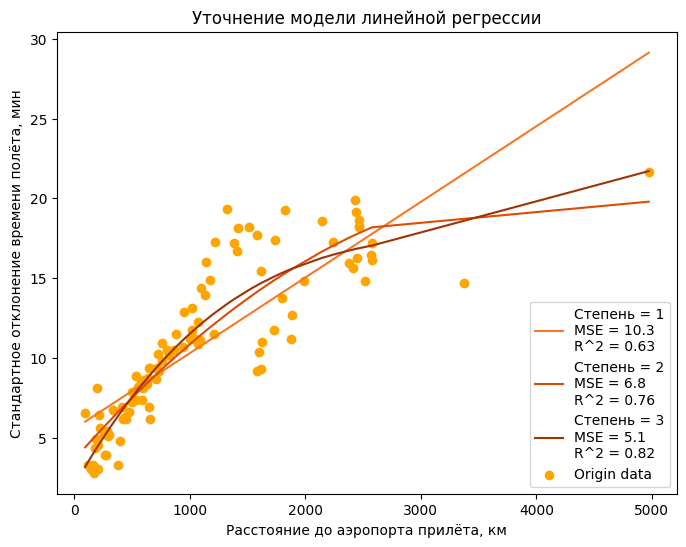

   Degree        MSE       R^2
0       1  10.342071  0.629877
1       2   6.784476  0.757197
2       3   5.060622  0.818890


In [12]:
from sklearn.preprocessing import PolynomialFeatures # Импорт модуля

metrics = {'Degree': [], 'MSE': [], 'R^2': []} # Создание словаря для значений метрик
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, 4)) # Градиентные цвета

plt.figure(figsize = (8, 6)) # Выбор размера графика

for i in range(1, 4): # Цикл для уточнения модели линейной регрессии исходным признаком, возведённым в разные степени
    poly = PolynomialFeatures(degree=i) # Выбор степени
    X_poly = poly.fit_transform(X) # Полиномиальное преобразование исходной переменной
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state = 10) # Разделение выборки на обучающую и тестовую
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train_poly) # Обучение модели

    # Сортировка исходных признаков для корректного отображения графиков моделей
    X_test_orig, y_test_orig = train_test_split(X, test_size = 0.2, random_state = 10)[0:2]
    sorted_index = np.argsort(X_test_orig[:, 0])
    X_sorted = X_test_orig[sorted_index]

    # Полиномиальное преобразование отсортированных признаков
    X_sorted_poly = poly.transform(X_sorted)
    y_pred_poly = poly_reg.predict(X_sorted_poly)
    
    mse = mean_squared_error(y_test_poly, poly_reg.predict(X_test_poly)) # Расчёт MSE
    rtwo = r2_score(y_test_poly, poly_reg.predict(X_test_poly)) # Расчёт коэффициента детерминации

    metrics['Degree'].append(i) # Запись степени в словарь
    metrics['MSE'].append(mse) # Запись значения MSE в словарь
    metrics['R^2'].append(rtwo) # Запись значения коэффициента детерминации в словарь
    
    plt.plot(X_sorted[:, 0], y_pred_poly, color = colors[i], label=f'Степень = {i}\nMSE = {mse:.1f}\nR^2 = {rtwo:.2f}') # Вывод графика
    
plt.scatter(grouped['distance'], grouped['air_time'], color = 'orange', label = 'Origin data') # Создание точечной диаграммы
plt.title('Уточнение модели линейной регрессии') # Добавление названия графика
plt.xlabel('Расстояние до аэропорта прилёта, км') # Добавление названия оси абсцисс
plt.ylabel('Стандартное отклонение времени полёта, мин') # Добавление названия оси ординат
plt.legend(loc = 'lower right') # Добавление легенды
plt.show() # Вывод графика

metrics_df = pd.DataFrame(metrics) # Преобразование словаря в DataFrame для более понятного отображения

print(metrics_df) # Вывод DataFrame со значениями метрик

# Задание №5
### Формулировка задания
Методом кластерного анализа выделите три группы авиакомпаний на основе пары признаков: средняя задержка прилета и средняя задержка вылета. Постройте точечную диаграмму на этих признаках и раскрасьте точки в соответствии с номером кластера. Попробуйте дать интерпретацию кластерам (в этом может помочь название авиакомпании).

### Описание действий
Для выделения заданного числа кластеров (в данном случае - трёх) был использован кластерный анализ на основе метода K-средних. Сначала был создан словарь со средними значениями задержек вылета и прилёта для каждой авиакомпании, после чего на его основе проведён кластерный анализ. Каждому кластеру был присвоен свой цвет и построена точечная диаграмма на значениях задержек с визуализацией кластеров по цветам. Для интерпретации кластеров была импортирована таблица "airlines" из набора данных nycflights13 для установления полных названий авиакомпаний. Для лучшей визуализации кластеры были обведены.

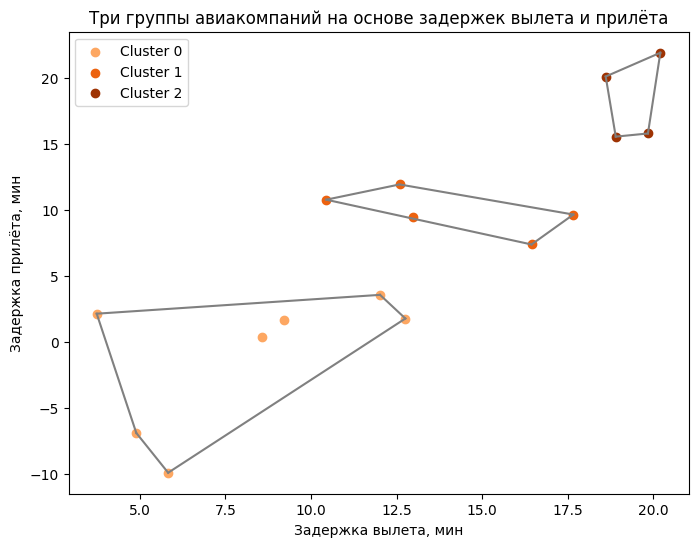

In [13]:
from sklearn.cluster import KMeans # Импорт функции для проведения кластерного анализа методом K-средних
from scipy.spatial import ConvexHull # Импорт функции для обведения кластеров

to_cluster_analysis = flights.groupby('carrier').agg({ # Создание словаря
    'dep_delay': 'mean', # Средние значения задержки вылета
    'arr_delay': 'mean' # Средние значения задержки прилёта
})

kmeans = KMeans(n_clusters = 3, random_state = 7) # Создание модели кластерного анализа
kmeans.fit(to_cluster_analysis) # Обучение модели кластерного анализа
to_cluster_analysis['cluster'] = kmeans.labels_ # Добавление в исходный словарь столбца с номером кластера


plt.figure(figsize = (8, 6)) # Выбор размеров графика
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, 3)) #  Оттенки оранжевого цвета для визуализации кластеров

for i in range(0, 3): # Цикл для построения точечной диаграммы с визуализацией кластеров
    plt.scatter(to_cluster_analysis[to_cluster_analysis['cluster'] == i]['dep_delay'], # Среднее значение задержки вылета
                to_cluster_analysis[to_cluster_analysis['cluster'] == i]['arr_delay'], # Среднее значение задержки прилёта
                color = colors[i], label = f'Cluster {i}') # Добавление цветовой метки и номера кластера
    points = to_cluster_analysis[to_cluster_analysis['cluster'] == i][['dep_delay', 'arr_delay']].values # Создание массива точек для обведения кластеров
    hull = ConvexHull(points) # Расчёт геометрических положений границ
    for simplex in hull.simplices: # Цикл для создания границ кластеров
        plt.plot(points[simplex, 0], points[simplex, 1], color = 'gray')

plt.title('Три группы авиакомпаний на основе задержек вылета и прилёта') # Добавление названия графика
plt.xlabel('Задержка вылета, мин') # Добавление названия оси абсцисс
plt.ylabel('Задержка прилёта, мин') # Добавление названия оси ординат
plt.legend() # Добавление легенды
plt.show() # Вывод графика

#### Названия авиакомпаний

In [ ]:
from nycflights13 import airlines # Импорт DataFrame с информацией об авиакомпаниях

clusters = to_cluster_analysis['cluster'].reset_index(drop = True) # Запись номеров кластеров в список и сброс индексов
airlines = airlines.join(clusters) # Добавление к исходной таблице номеров кластеров
airlines = airlines.sort_values(by = 'cluster') # Сортировка названий авиакомпаний по номеру кластера

#### Интерпретация кластеров
Всего было выделено три группы авиакомпаний на основании средних значений задержек прилёта и вылета. На точечной диаграмме видно, что они расположены по возрастанию задержек как прилёта, так и вылета. Нулевому кластеру соответсвуют самые низкие значения задержек, причём в случае задержек прилёта - даже отрицательные. Второму кластеру соответствуют самые высокие значения задержек. Первый кластер располагается посередине. Интерпретация такого деления представляется возможной благодаря использованию полных названий авиакомпаний, при сопоставлении которых с номерами кластеров видно, что нулевому кластеру с минимальными задержками соответствуют самые крупные магистральные авиакомпании США, а второму кластеру - небольшие региональные. Авиакомпании, попавшие в первый кластер, являются средними по величине. Таким образом, результаты кластерного анализа по задержкам прилётов и вылетов можно объяснить величиной авиакомпании (то есть капитализацией, численностью парка самолётов и т.д.).